# Exercise 3 | Part 1: One-vs-all

In [1]:
%matplotlib inline

from scipy.io import loadmat
from scipy.optimize import minimize
from numpy import mean, sqrt, floor, ceil, ones, newaxis, arange, zeros, ones, c_, array, log, finfo, float64, exp
from numpy.random import permutation
from matplotlib.pyplot import show, imshow, axis

In [2]:
def sigmoid(z):
  return 1 / (1 + exp(-z))

In [3]:
def display_data(X, example_width=None):
    m, n = X.shape
    if not example_width:
      # assume the example is a square image
      example_width = round(sqrt(n))

    # Compute rows, cols
    example_height = int((n / example_width))
    example_width = int(example_width)

    # Compute number of items to display
    display_rows = int(floor(sqrt(m)))
    display_cols = int(ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - ones((pad + display_rows * (example_height + pad),
                            pad + display_cols * (example_width + pad)))

    base_rows = arange(example_height)
    base_cols = arange(example_width)

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))

            #print X[curr_ex, :].reshape(example_height, example_width) / max_val
            rows = pad + base_rows[:, newaxis] + j * (pad + example_height)
            cols = pad + base_cols + i * (pad + example_width)
            display_array[rows, cols] = X[curr_ex, :]\
              .reshape(example_height, example_width) / max_val
            curr_ex += 1

    imgplot = imshow(display_array.T)
    # Gray Image
    imgplot.set_cmap('gray')
    axis('off')

In [4]:
eps = finfo(float64).eps

def cost_function_reg(theta, X, y, lambda_):
    '''cost function with regularization'''

    m, n = X.shape
    theta = theta.reshape(n, 1)
    h_theta = sigmoid(X.dot(theta))
    # tolerance values to avoid Precision loss error
    h_theta[h_theta < eps] = eps
    h_theta[(1. - eps < h_theta) & (h_theta < 1. + eps)] = 1 - eps

    J = (- y.T.dot(log(h_theta)) - (1. - y).T.dot(log(1. - h_theta))) / m + lambda_ / (2. * m) * (theta[1:]**2).sum()

    grad = (X.T.dot(h_theta - y) / m).flatten()
    grad[1:] = grad[1:] + lambda_ / m * theta.flatten()[1:]

    return J[0, 0], grad

In [5]:
def one_vs_all(X, y, num_labels, lambda_):
    '''train multiple logistic regression classifier'''

    m, n = X.shape
    all_theta = zeros((num_labels, n + 1))
    initial_theta = zeros((n + 1, 1))
    X = c_[ones((m, 1)), X]

    for i in range(1, num_labels + 1):
        result = minimize(cost_function_reg,
                      initial_theta,
                      args=(X, y==i, lambda_),
                      method='CG',
                      jac=True,
                      options=dict(maxiter=50))
        cost = result.fun
        print(f'Training {i}, cost = {cost}')
        theta = result.x
        all_theta[i - 1, :] = theta

    return all_theta

In [6]:
def predict_one_vs_all(all_theta, X):
    m, n = X.shape
    X = c_[ones((m, 1)), X]

    return sigmoid(X.dot(all_theta.T)).argmax(axis=1) + 1

In [7]:
# Setup the parameters you will use for this part of the exercise
# 20x20 Input Images of Digits
# 10 labels, from 1 to 10   
# (note that we have mapped "0" to label 10)

input_layer_size = 400 
num_labels = 10

# Part 1: Loading and Visualizing Data

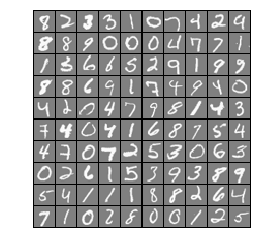

In [8]:
# training data stored in arrays X, y

data1 = loadmat('ex3data1.mat')
X = data1['X']
y = data1['y']
m, n = X.shape

# Randomly select 100 data points to display
rand_indices = permutation(m)
sel = X[rand_indices[:100], :]

display_data(sel)
show(block=False)

# Part 2: Vectorize Logistic Regression

Training One-vs-All Logistic Regression...

In [9]:
lambda_ = 0.1
all_theta = one_vs_all(X, y, num_labels, lambda_)

Training 1, cost = 0.013907740773081894
Training 2, cost = 0.05645810144260285
Training 3, cost = 0.0619539795780181
Training 4, cost = 0.03740201562040984
Training 5, cost = 0.06207647904151859
Training 6, cost = 0.020027620181104256
Training 7, cost = 0.03343858276547611
Training 8, cost = 0.08554358652337807
Training 9, cost = 0.07629423665452964
Training 10, cost = 0.009109685510412475


# Part 3: Predict for One-Vs-All

In [10]:
pred = predict_one_vs_all(all_theta, X)
print(f'Training Set Accuracy: {mean(pred == y.flatten()) * 100}')

Training Set Accuracy: 95.17999999999999
